 ## Question 1:  
  
  
Let $y=e^{-x/10} sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$.
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$  

$$
\renewcommand{\ds}{\displaystyle}
$$

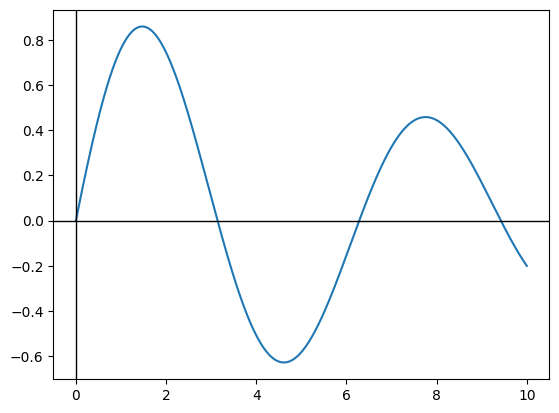

In [1]:
#1

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10001)
y = np.e**(-x / 10) * np.sin(x)  # np.e**(-x/10) = np.exp(-x/10)

fig, ax = plt.subplots()

ax.plot(x, y)

ax.axhline(0, color = 'black', linewidth = 1)
ax.axvline(0, color = 'black', linewidth = 1)

In [2]:
# A multiplicacao de valores boolean e similar ao comando and.

print(
    True * True, 
    True * False, 
    False * True, 
    False * False)


1 0 0 0


In [3]:
#2 

print('', x>=4, '', x<=7, '', (x>=4)*(x<=7), '', sep='\n')

print(np.mean(y[(x>=4)*(x<=7)]),
    np.std(y[(x>=4)*(x<=7)]), sep='\n\n')


[False False False ...  True  True  True]

[ True  True  True ... False False False]

[False False False ... False False False]

-0.2956023068963138

0.31448753875085117


In [4]:
# 3 

y_m = np.percentile(y[(x>=4)*(x<=7)], 80)

y_m

np.float64(0.06145551274590662)

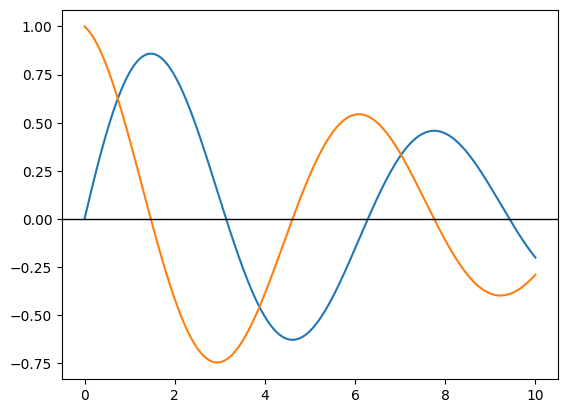

In [5]:
#4

dydx = np.gradient(y, x)

"""
ax = plt.gca()                                     # gca -> get current axes

plt.gca().spines['top'].set_position('zero')       # Como seria o comando sem transformar em 'ax'
#                                                      Move o eixo de cima pro meio.

ax.spines['right'].set_color('none')               # Esconde o eixo da direita

Melhor:

"""

fig, ax = plt.subplots()

ax.plot(x, y, label = 'f(x)')
ax.plot(x, dydx, label = 'dy/dx')
ax.axhline(0, color = 'black', linewidth = 1)

In [6]:
#5

"""
Se voce multiplicar dx consecutivamente, as unicas vezes que o resultado da multiplicacao dara um numero
negativo serao quando os dx estiverem passando de quadrante, ou seja, passando pelo eixo x. 
Essas sera as raizes.

"""

dydx[1:]                           # Todos os pontos tirando o primeiro
dydx[:-1]                          # Todos os pontos tirando o ultimo

dydx[1:] * dydx[:-1]               # Multiplicará o primeiro * segundo , segundo * terceiro, e assim por diante

dydx[1:] * dydx[:-1] < 0           # Checa apenas as multiplicacoes que dao numeros menores que 0

x[1:][dydx[1:] * dydx[:-1] < 0]    # x[1:] é uma array. Se tira um termo pra elas terem o mesmo tamanho.
#                            note que [dydx[1:] * dydx[:-1] < 0] é ambos o index de x, quanto uma boolean array

print( x[1:][dydx[1:] * dydx[:-1] < 0] )

#check

print()
print(dydx[1471], dydx[1472])

# Maior valor de y para essa variacao de x (10001): 

print()
print(y[1471])

[1.472 4.613 7.755]

0.00011078801094299706 -0.0007566490351678112

0.8589127436978206


In [7]:
#  Teste

"""

x = np.linspace(-9, 9, 100)
y = x**2 - 20


print()
print((y))

print()
print(y[1:])

print()
print(y[:-1])

print()
print(y[1:] * y[:-1])

print()
print(y[1:] * y[:-1] < 0)


plt.plot(x, y)

ax = plt.gca()

ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')

"""

"\n\nx = np.linspace(-9, 9, 100)\ny = x**2 - 20\n\n\nprint()\nprint((y))\n\nprint()\nprint(y[1:])\n\nprint()\nprint(y[:-1])\n\nprint()\nprint(y[1:] * y[:-1])\n\nprint()\nprint(y[1:] * y[:-1] < 0)\n\n\nplt.plot(x, y)\n\nax = plt.gca()\n\nax.spines['top'].set_position('zero')\nax.spines['right'].set_color('none')\n\n"

## Question 2:

Sum together every number from 0 to 10000 except for those that can be divided by 4 or 7. Do this in one line of code.

Remembering:
$$
S_n = \frac{n}{2} (a_1 + a_n)
$$

Therefore,

$$
\text{S} = \sum_{i = 0}^{i = 10000} i, \text{when i is neither divisible by 4 nor by 7.}
$$

Which is equivalent to: 

$$
\text{S} = \sum_{i = 0}^{10000}i - \sum_{i \equiv 0 (4)}{}i - \sum_{i \equiv 0 (7)}{}i + \sum_{i \equiv 0 (28)}{}i
$$

We will have to find, then:

$$
S = S_{total} - S_4 - S_7 + S_{28}
$$

First solution. More than one line, using the normal for loop.


In [8]:
import math

fit = []

for i in range(10001):
    if not i%4 == 0 and not i%7 == 0:
        fit.append(i)
sum(fit)


32147142

Second solution. From the [video](https://youtu.be/DcfYgePyedM?si=OC-HtoZWbFgEwgi9&t=1924). Using a boolean array as an index.

In [9]:
sum_1 = sum(np.arange(0, 10001, 1)[(np.arange(0, 10001, 1)%4 != 0) * (np.arange(0, 10001, 1)%7 != 0)])

int(sum_1)

32147142

Third solution. Using the gauss summation.
$$
S_n = \frac{n}{2} (a_1 + a_n)
$$

$$
S = S_{total} - S_4 - S_7 + S_{28}
$$

In [10]:
""" 
Para achar o ultimo multiplo, voce pode usar o modulo (%) ou o math.floor

1) 10000 - (10000 % 7)

2) math.floor(10000 / 7) * 7

"""
n = 10000

sum_t = n / 2 * (1 + n)
sum_4 = math.floor(10000/4) / 2 * (4 + 10000 - (10000%4))
sum_7 = math.floor(10000/7) / 2 * (7 + 10000 - (10000%7))
sum_28 = math.floor(10000/28) / 2 * (28 + math.floor(10000 / 28) * 28)

sum_2 = int(sum_t - sum_4 - sum_7 + sum_28)

In [11]:
# In "one line"

sum_2_2 = int(((5000 * (1 + 10000)) 
           - (2500 / 2 * (10004)) 
           - (math.floor(10000 / 7) / 2 * (7 + 10000 - (10000 % 7))) 
           + (math.floor(10000 / 28) / 2 * (28 + 10000 - (10000 % 28)))))

In [12]:
print(f'More than one line for loop: -> {sum(fit)}', 
      f'Video Suggestion: {sum_1}',
      f'Gaussian Summation: \n1: {sum_2} \n2: {sum_2_2}', sep='\n\n')

More than one line for loop: -> 32147142

Video Suggestion: 32147142

Gaussian Summation: 
1: 32147142 
2: 32147142


## Question 3:
    
Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$,

1. Make a plot of the flower (find x and y points),

2. Compute the area using the calculus formula $A = \ds\int_{0}^{2\\pi} \frac{1}{2} r^2 d\theta$,

3. Compute the arclength using the calculus formula $L = \ds\int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

In [13]:
theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + 3 / 4 * np.sin(3 * theta)

$$
\text{In orther to convert from polar coordinates to cartestian, you must solve:}\\
$$

$$

x = r \, cos(\theta)\\
y = r \, sin(\theta)

$$

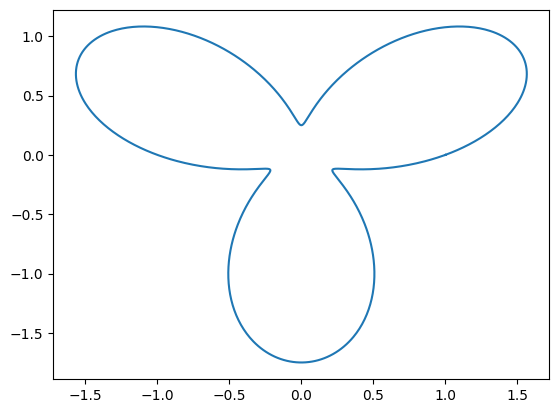

In [14]:
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots()

ax.plot(x, y)

#### 2: Compute the Area.

$ A = \ds \int_{0}^{2\\pi} \frac{1}{2} r^2 d\theta $

In [15]:
d_theta = theta[1] - theta[0]

area = 1 / 2 * np.sum(r**2) * d_theta

float(area)

4.028310324802903

#### 3: Compute the Archlength.

$L = \ds\int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

In [16]:
length = np.sum(np.sqrt(r**2 + (np.gradient(r, theta))**2) * d_theta)

float(length)

11.640021569013864

## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \ds\int_{t'=0}^{t'=t} P(t') dt' $

By isolating $T^4$, it's possible to infer:

$$
T^4 = \frac{P}{A \sigma \epsilon}
$$

And, therefore:

$$
\left(T_0 \, \frac{1}{1 + e^{-kt}}\right)^4 = \frac{P}{A \sigma \epsilon}

$$
Dividing by $T_0^4$ on both sides, we get:

$$
\left(\frac{1}{1 + e^{-kt}}\right)^4 = \frac{P}{A \sigma \epsilon T_0^4}
$$

Note that $\frac{P}{A \sigma \epsilon T_0^4}$ is dimensionless, since it is [P]/[P]. 

Now, since we don't know 'k' value, we must plot the right side by varying both t and k from the left side.



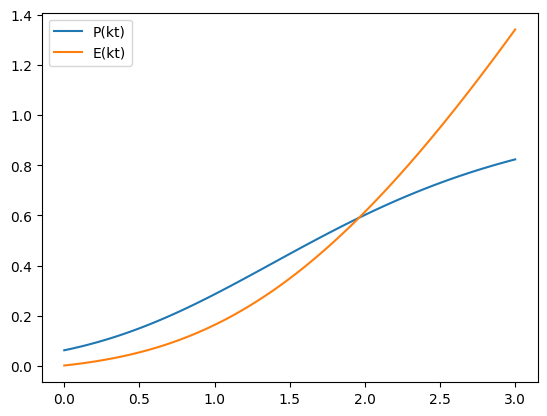

In [ ]:
kt = np.linspace(0, 3, 100)
P = (1 / (1 + np.exp(-kt)))**4

d_kt = kt[1] - kt[0]

E = np.cumsum(P) * d_kt

fig, ax = plt.subplots()

ax.plot(kt, P, label = 'P(kt)')
ax.plot(kt, E, label = 'E(kt)')

ax.legend()